In [78]:
import pandas as pd
import numpy as np

In [79]:
data=pd.read_csv("USA_cars_datasets.csv",index_col=0)

In [80]:
data=data.drop(data[data.price==0].index,axis=0).sort_values(by="price").reset_index(drop=True)

In [81]:
def year(x):
    return 2021-x
data["year"]=data["year"].apply(year)

In [82]:
data.drop(["vin","lot"],axis=1,inplace=True)

In [83]:
#Here is algorithm for intersection over IQR in all columns one by one.
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
data_columns=[]
data2={}
a=[]
intersection=[]
for i in data.columns:
    if data[str(i)].dtype=='int' or data[str(i)].dtype=='float':
        data_columns.append(i)
        data2["{0}".format(i)] =data[(data[str(i)]> lower_limit[str(i)])&(data[str(i)]< upper_limit[str(i)])]
for i in data2:
    for i in [i for i in list(data2[i].index)]:
        a.append(i)
for i in a:
    if a.count(i)==len(data_columns):
        intersection.append(i)
data2=data.loc[intersection].drop_duplicates()

In [84]:
data2.shape[0]/data.shape[0]

0.9234527687296417

In [85]:
import matplotlib.pyplot as plt

In [86]:
data2.reset_index(drop=True,inplace=True)

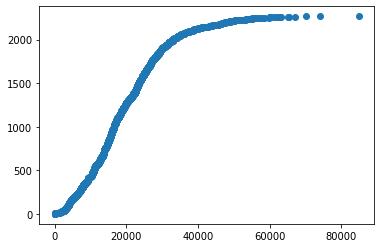

In [87]:
plt.scatter(x=data2.price,y=data2.index)

In [88]:
y=data2["price"]

In [89]:
"""x=data2.drop(["price","vin","lot"],axis=1)"""
x=data2.drop(["price"],axis=1)
x=pd.get_dummies(x,drop_first=True)

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x.values,y.values,test_size=0.33,random_state=42)

In [91]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [92]:
y_pred=regressor.predict(x_test)

In [93]:
son=pd.DataFrame({"Gercek":y_test,"Tahmin":y_pred},columns=["Gercek","Tahmin"])

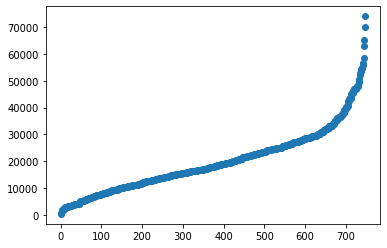

In [94]:
son.sort_values(by="Gercek",inplace=True)
son.reset_index(drop=True,inplace=True)
plt.scatter(data=son,x=son.index,y="Gercek")

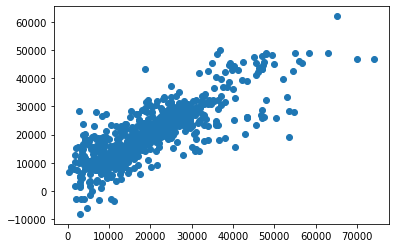

In [95]:
plt.scatter(data=son,x="Gercek",y="Tahmin")

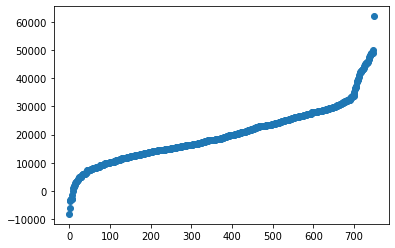

In [96]:
son.sort_values(by="Tahmin",inplace=True)
son.reset_index(drop=True,inplace=True)
plt.scatter(data=son,x=son.index,y="Tahmin")

In [97]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.66590489250946